In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the dataset (replace 'your_dataset.csv' with your actual file)
# You can also load data from other sources like databases, Excel, etc.
df = pd.read_excel(r'C:\Users\dhaswin\Desktop\Crime data and community investments\Cleaned Dataset\data_cts_corruption_and_economic_crime.xlsx')


In [5]:
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
  Iso3_code      Country    Region                        Subregion Indicator  \
0       ARM      Armenia      Asia                     Western Asia  Offences   
1       AUT      Austria    Europe                   Western Europe  Offences   
2       CHE  Switzerland    Europe                   Western Europe  Offences   
3       CHL        Chile  Americas  Latin America and the Caribbean  Offences   
4       COL     Colombia  Americas  Latin America and the Caribbean  Offences   

            Dimension    Category    Sex    Age  Year Unit of measurement  \
0  by type of offence  Corruption  Total  Total  2013              Counts   
1  by type of offence  Corruption  Total  Total  2013              Counts   
2  by type of offence  Corruption  Total  Total  2013              Counts   
3  by type of offence  Corruption  Total  Total  2013              Counts   
4  by type of offence  Corruption  Total  Total  2013              Counts   

     VALUE Source  
0

In [7]:
# Summary statistics for numeric columns
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
               Year         VALUE
count  20884.000000  2.088400e+04
mean    2015.226298  2.694265e+04
std        5.111188  2.174594e+05
min     2003.000000  8.229151e-04
25%     2012.000000  1.135615e+01
50%     2016.000000  1.610000e+02
75%     2019.000000  1.680973e+03
max     2022.000000  7.026802e+06


In [9]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Iso3_code              0
Country                0
Region                 0
Subregion              0
Indicator              0
Dimension              0
Category               0
Sex                    0
Age                    0
Year                   0
Unit of measurement    0
VALUE                  0
Source                 0
dtype: int64


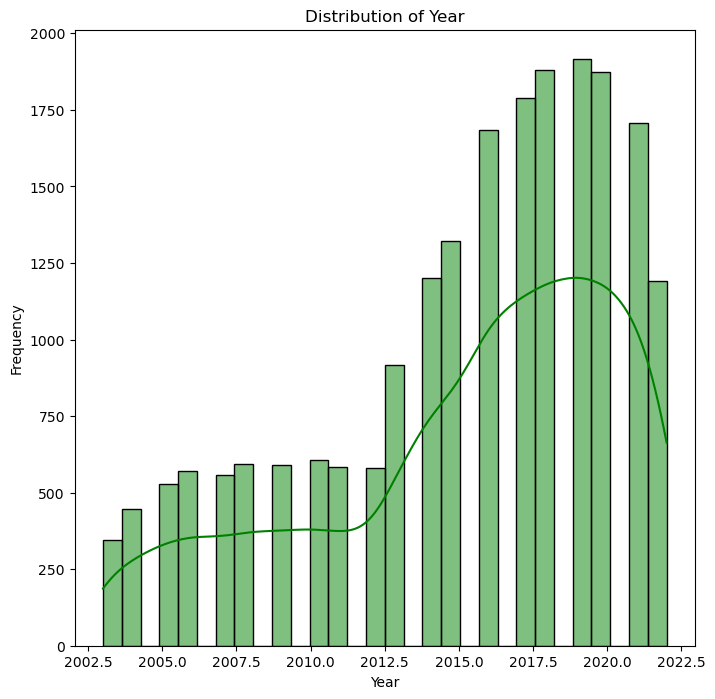

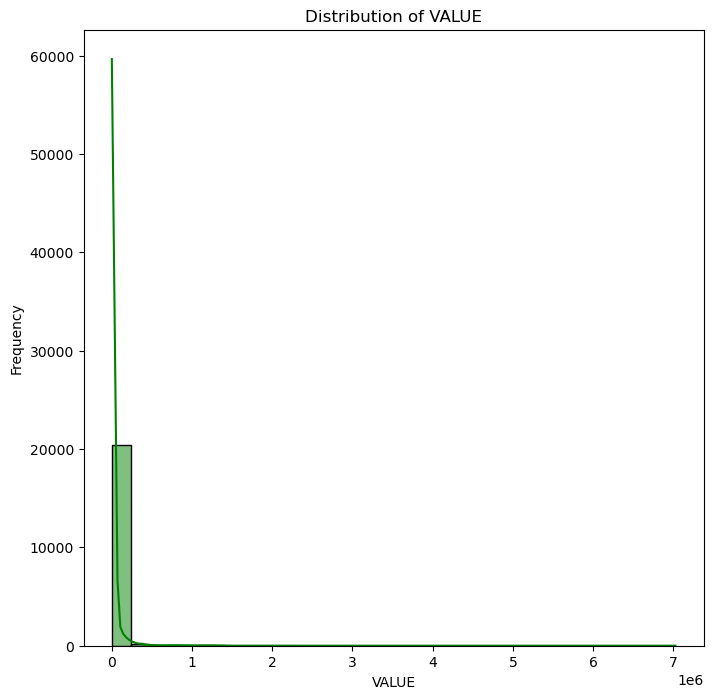

In [17]:
# Distribution of numerical features
for col in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 8))
    sns.histplot(df[col], kde=True, bins=30, color='green')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

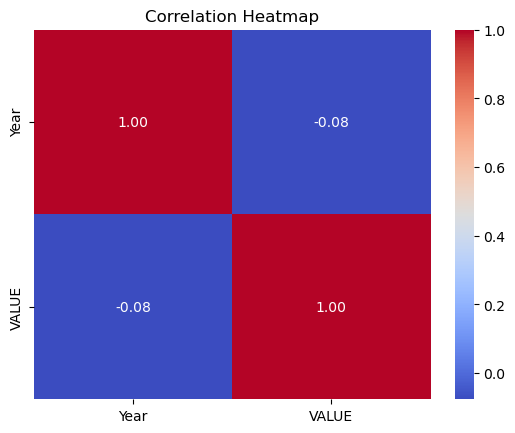

In [13]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")

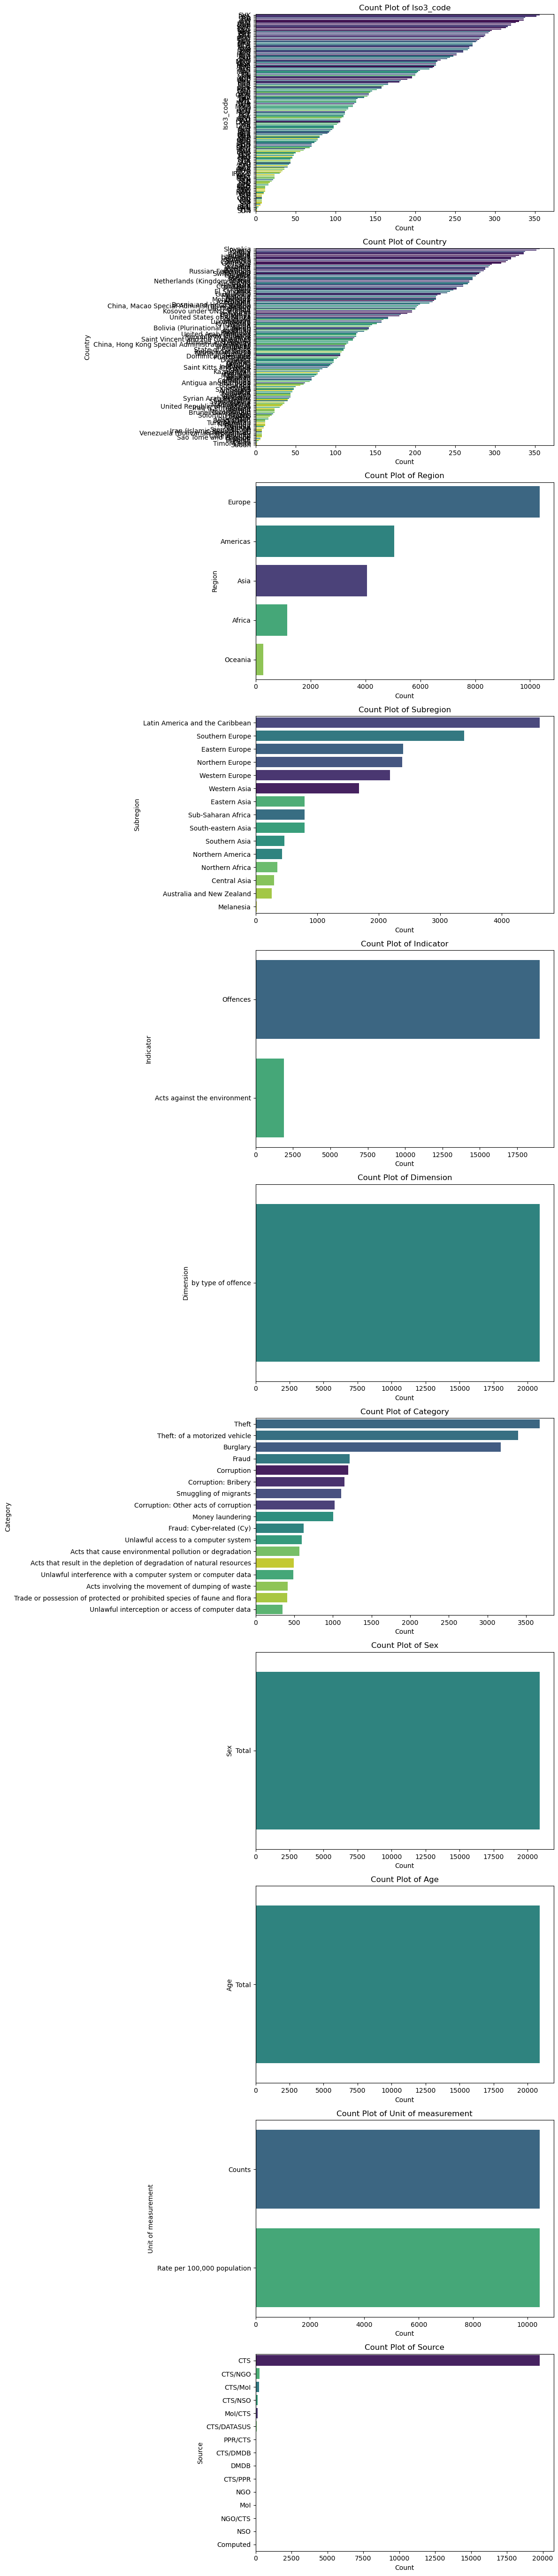

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

import pandas as pd

# Load the Excel file
file_path = r'C:\Users\dhaswin\Desktop\Crime data and community investments\Cleaned Dataset\data_cts_corruption_and_economic_crime.xlsx'
df = pd.read_excel(file_path)

# Filter for categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Set up the number of rows and columns for subplots
num_cols = len(categorical_cols)
cols_per_row = 1  # Adjust the number of columns per row as needed
num_rows = math.ceil(num_cols / cols_per_row)

# Create a figure
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(12, num_rows * 5))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(
        y=df[col], 
        order=df[col].value_counts().index, 
        ax=axes[i], 
        hue=df[col],  # Set hue to the same column
        palette='viridis',
        legend=False  # Disable the legend since hue is redundant here
    )
    axes[i].set_title(f"Count Plot of {col}")
    axes[i].set_xlabel("Count")
    axes[i].set_ylabel(col)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


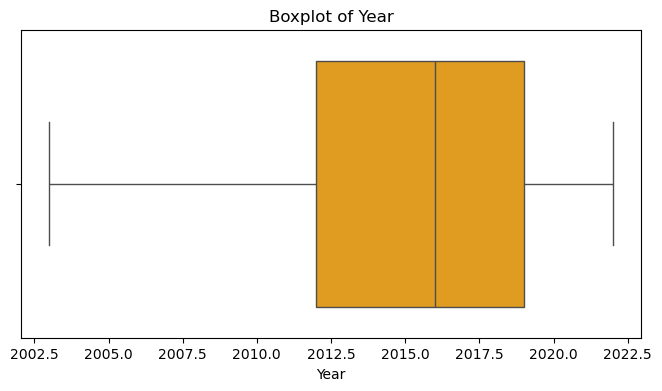

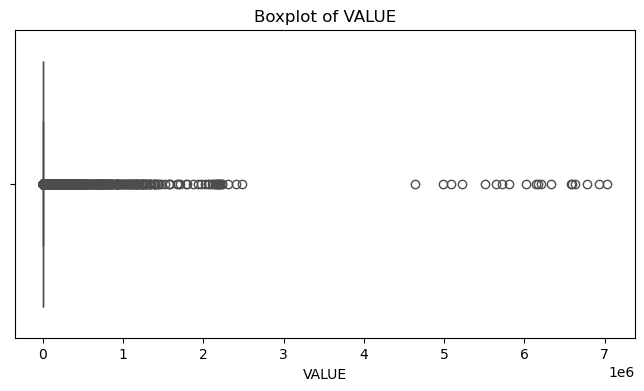

In [19]:
# Identify outliers using boxplots
for col in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='orange')
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

In [21]:
# Check unique values in categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())


Unique values in Iso3_code:
['ARM' 'AUT' 'CHE' 'CHL' 'COL' 'CYP' 'DEU' 'DNK' 'DOM' 'FIN' 'GTM' 'HND'
 'HUN' 'KEN' 'LTU' 'NLD' 'NOR' 'POL' 'PRT' 'RUS' 'SRB' 'SVK' 'SVN' 'SWE'
 'TUR' 'USA' 'XKX' 'BEL' 'BGR' 'CRI' 'CZE' 'ITA' 'LUX' 'MCO' 'MDV' 'OMN'
 'ALB' 'ATG' 'BOL' 'ECU' 'IDN' 'LIE' 'MLT' 'MNG' 'ROU' 'AND' 'AZE' 'BHS'
 'BIH' 'ESP' 'FRA' 'GNB' 'GUY' 'HRV' 'JAM' 'KNA' 'LBN' 'LVA' 'MAR' 'MEX'
 'MNE' 'PER' 'PHL' 'PRY' 'SAU' 'SEN' 'SGP' 'SLV' 'THA' 'UGA' 'BRB' 'BTN'
 'EST' 'GRC' 'IRL' 'KAZ' 'MDA' 'PAN' 'PSE' 'UKR' 'CMR' 'DJI' 'DMA' 'DZA'
 'JOR' 'LCA' 'MYS' 'SYR' 'ARE' 'BLZ' 'GEO' 'MAC' 'MKD' 'TTO' 'URY' 'MUS'
 'GRD' 'NAM' 'QAT' 'VCT' 'MMR' 'UZB' 'BLR' 'KGZ' 'CHN' 'BEN' 'IRQ_C' 'ISR'
 'PRI' 'CAN' 'LKA' 'NZL' 'VEN' 'ISL' 'SUR' 'AUS' 'BMU' 'BRN' 'HKG' 'JPN'
 'SWZ' 'ZWE' 'IND' 'MOZ' 'SLB' 'BGD' 'BHR' 'NPL' 'BRA' 'EGY' 'KOR' 'TJK'
 'CIV' 'GIN' 'LSO' 'NGA' 'RWA' 'SLE' 'BWA' 'MDG' 'PAK' 'TZA' 'CPV' 'TLS'
 'IRN' 'KWT' 'ARG' 'NIC' 'TKM' 'STP' 'SDN' 'BDI' 'YEM']

Unique values in Country:
['Armenia'

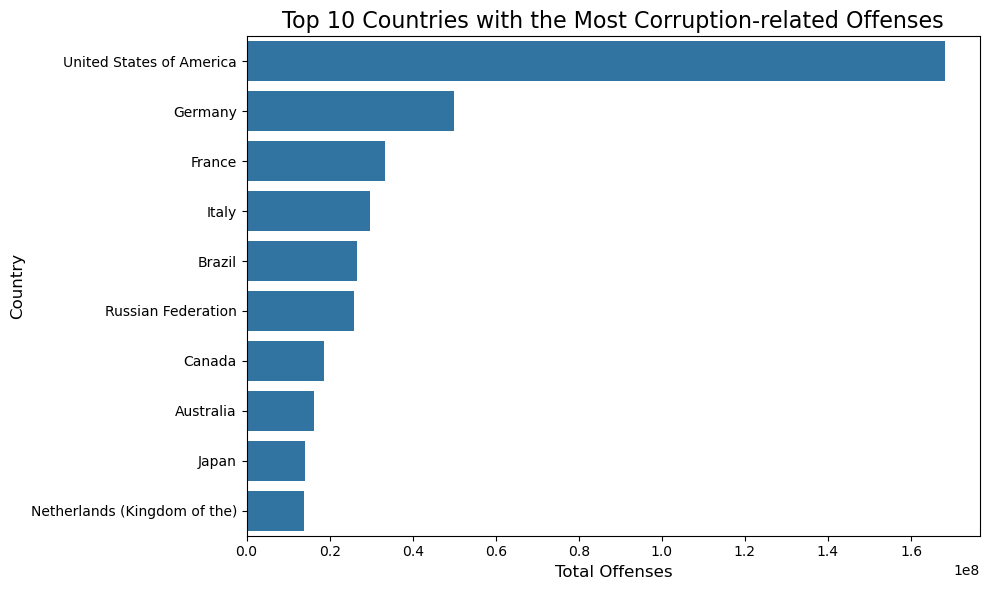

                          Country       VALUE
147      United States of America 168,206,416
51                        Germany  49,983,203
49                         France  33,319,987
67                          Italy  29,752,227
22                         Brazil  26,598,416
115            Russian Federation  25,776,180
28                         Canada  18,664,154
6                       Australia  16,322,200
69                          Japan  14,032,162
96   Netherlands (Kingdom of the)  13,911,697


In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file directly
file_path = r'C:\Users\dhaswin\Desktop\Crime data and community investments\Cleaned Dataset\data_cts_corruption_and_economic_crime.xlsx'
df = pd.read_excel(file_path, sheet_name='Corruption Altered')

# Aggregate the data by 'Country' and sum the 'VALUE' column to get the total offenses per country
country_offenses = df.groupby('Country')['VALUE'].sum().reset_index()

# Sort the countries by the total offenses in descending order
sorted_country_offenses = country_offenses.sort_values(by='VALUE', ascending=False)

# Get the top 10 countries with the most corruption-related offenses
top_countries = sorted_country_offenses.head(10)

# Set pandas display options to prevent scientific notation
pd.set_option('display.float_format', '{:,.0f}'.format)

# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x='VALUE', y='Country', data=top_countries)

# Adding labels and title
plt.title('Top 10 Countries with the Most Corruption-related Offenses', fontsize=16)
plt.xlabel('Total Offenses', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

# Display the top countries with the full-digit offenses, without the index
print(top_countries[['Country', 'VALUE']])



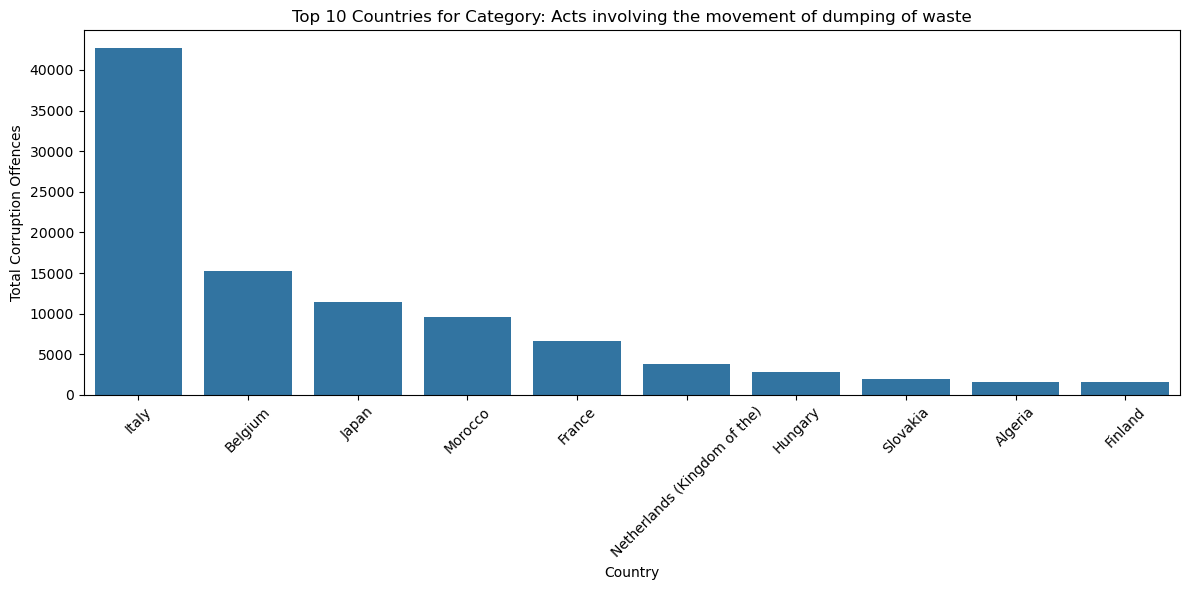

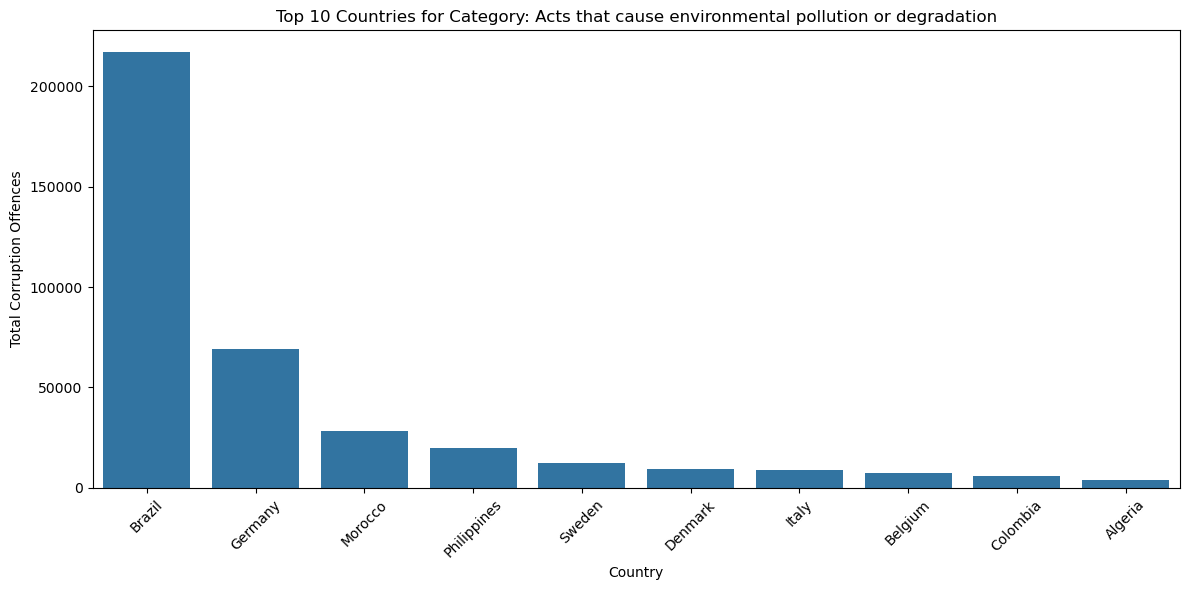

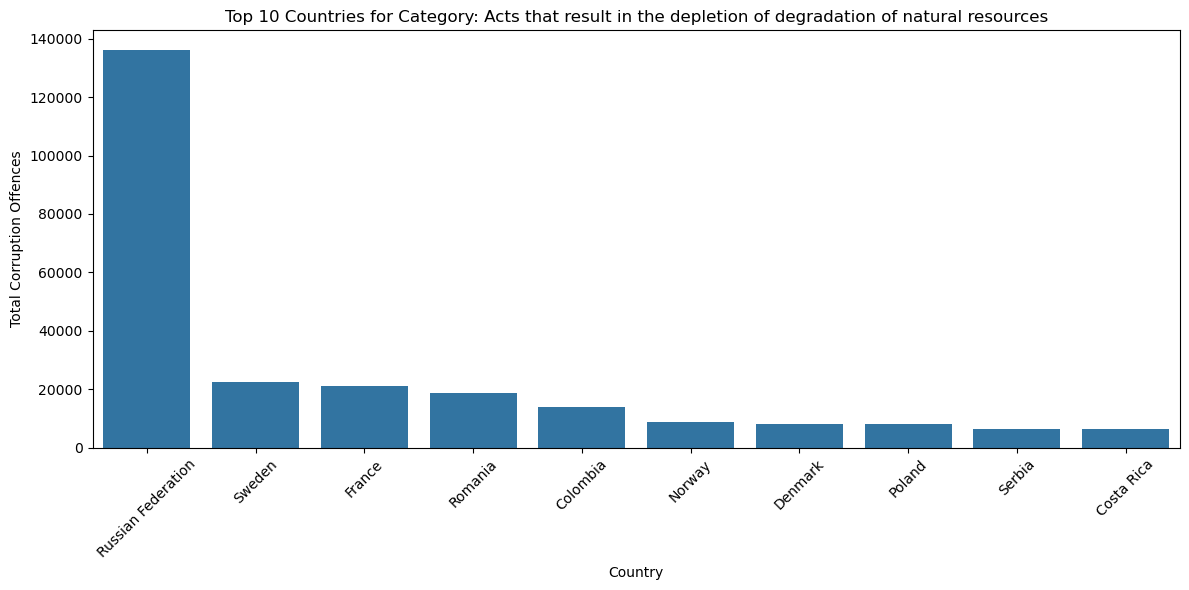

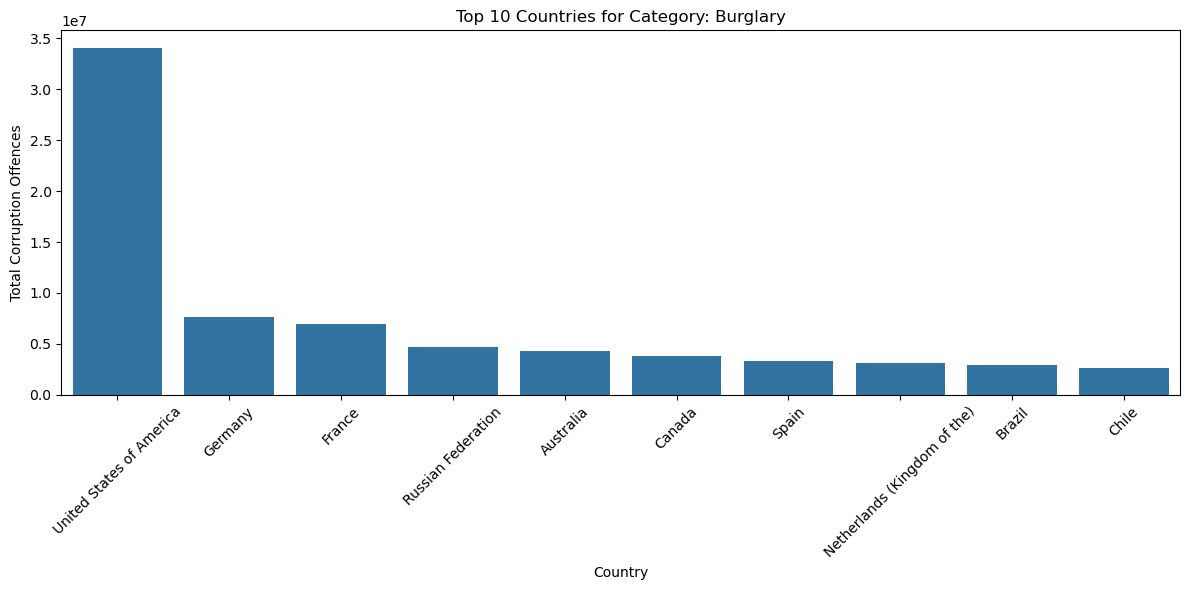

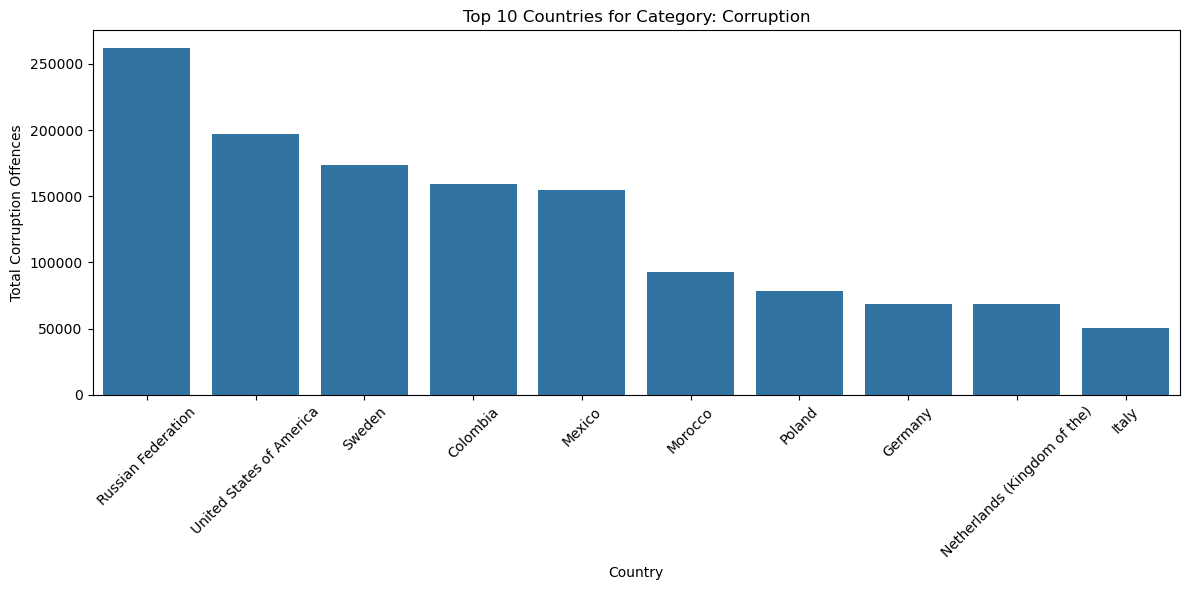

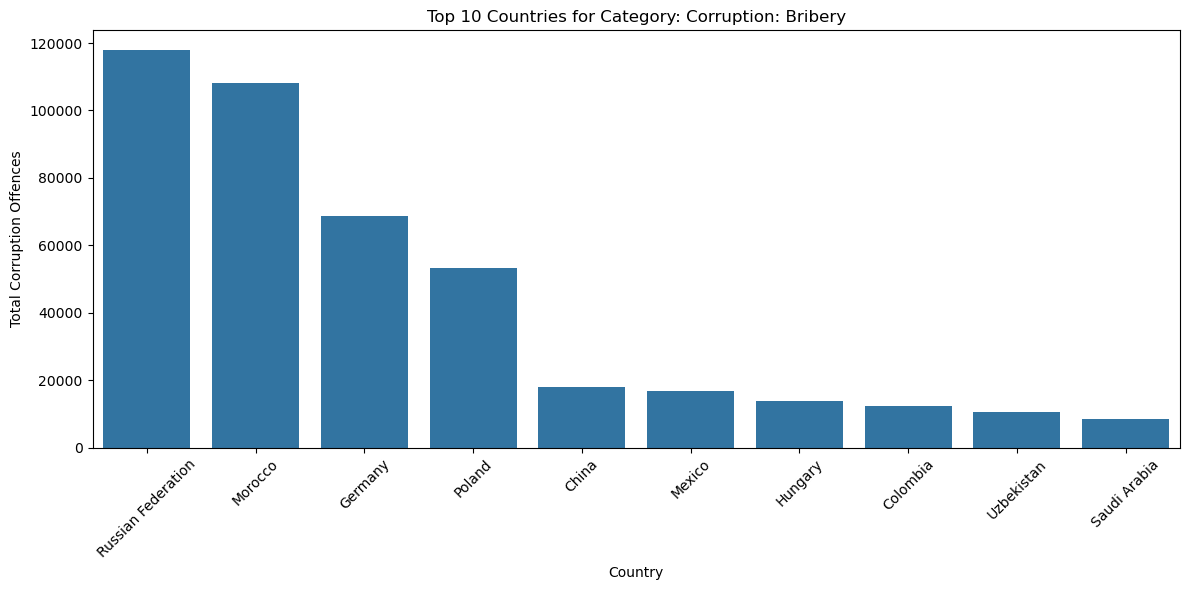

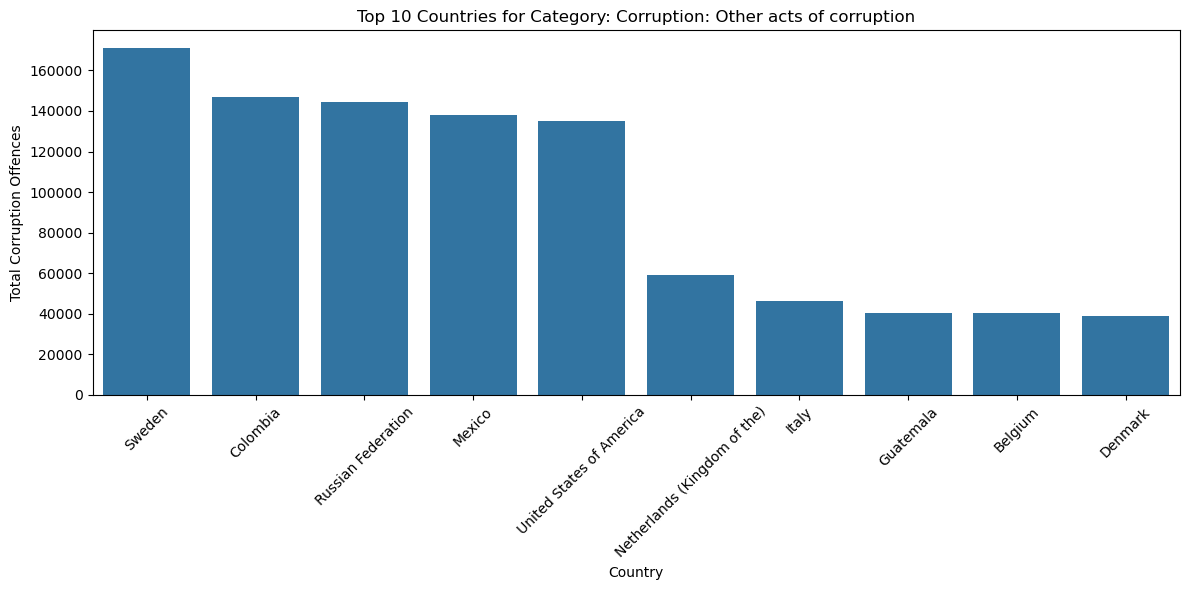

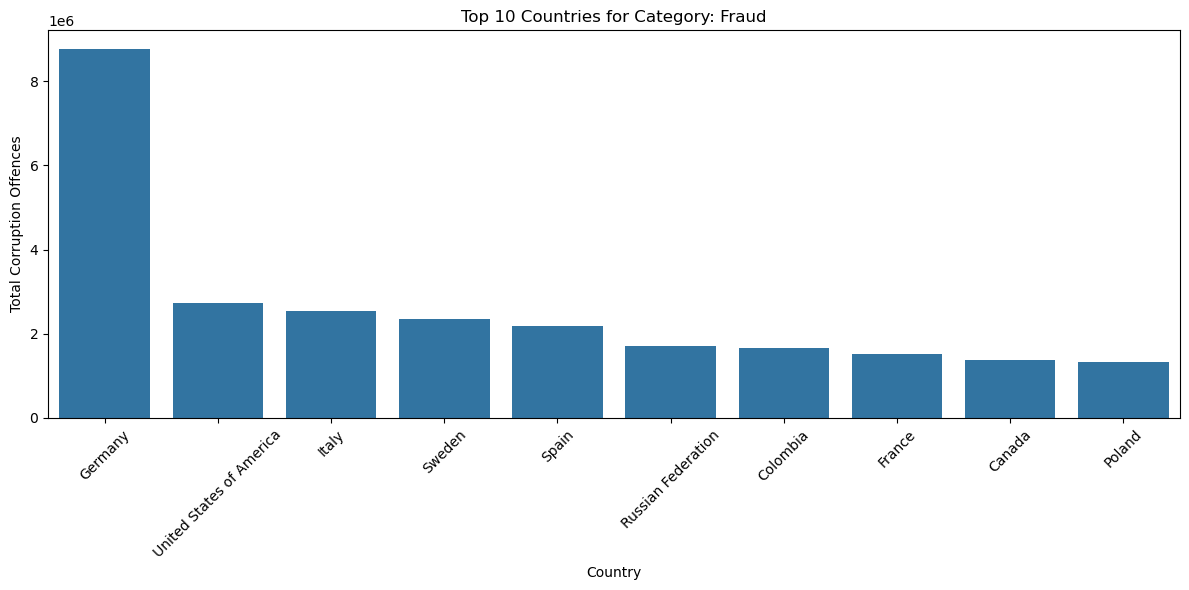

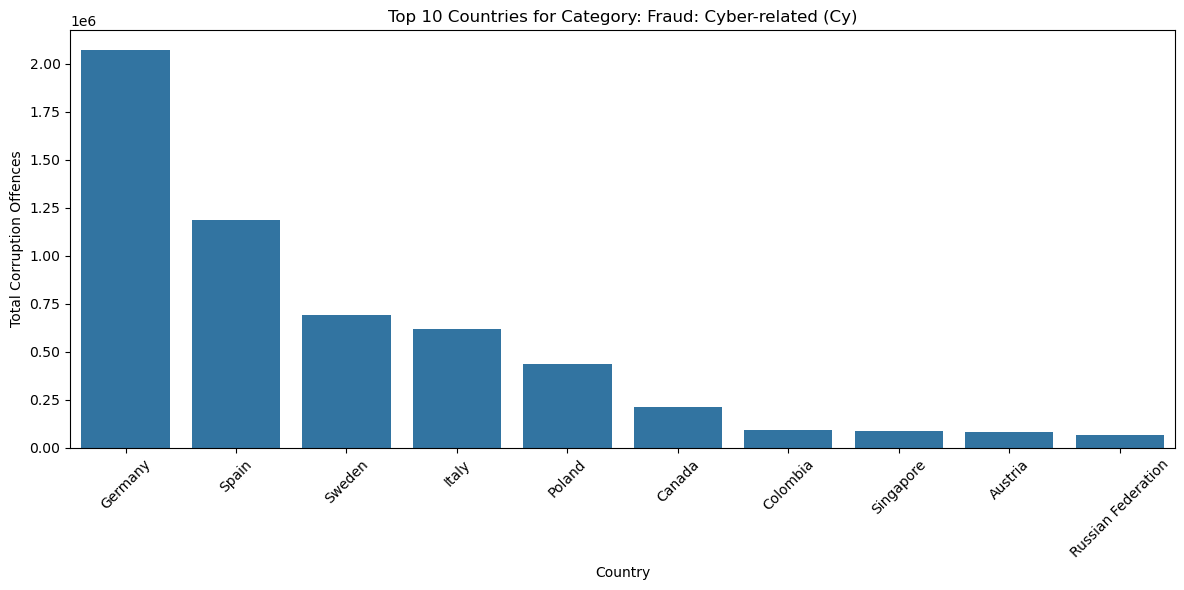

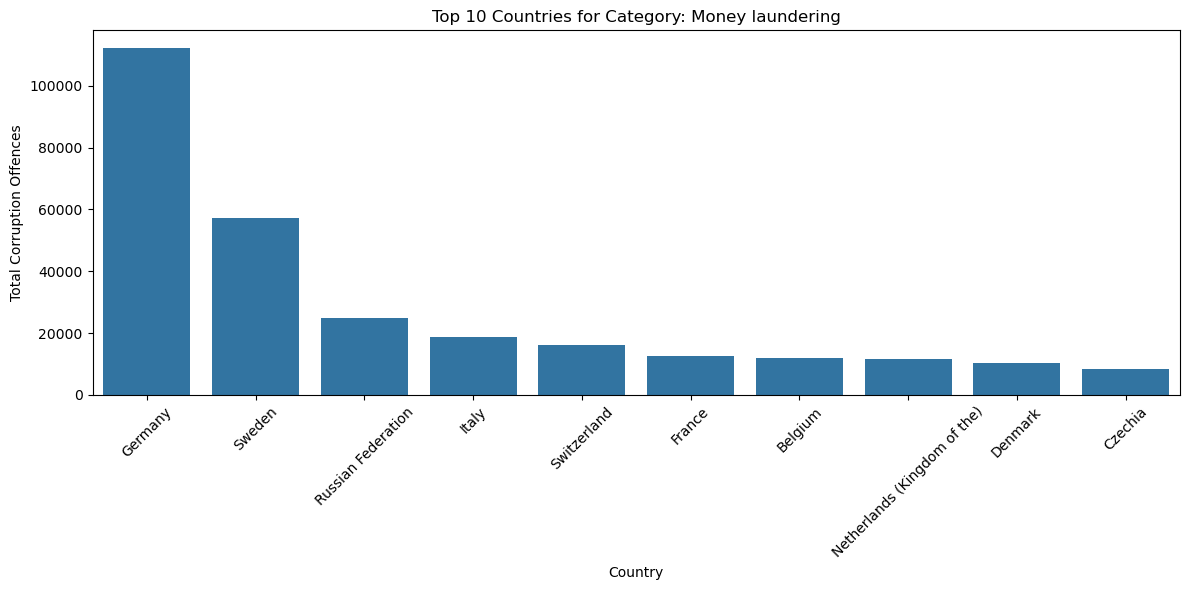

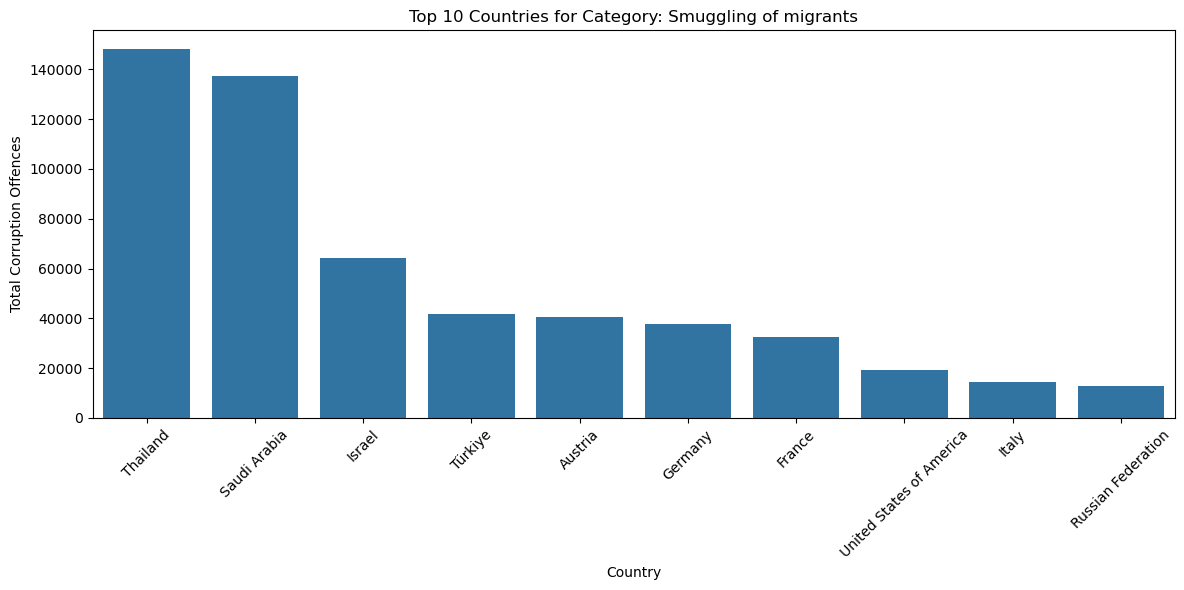

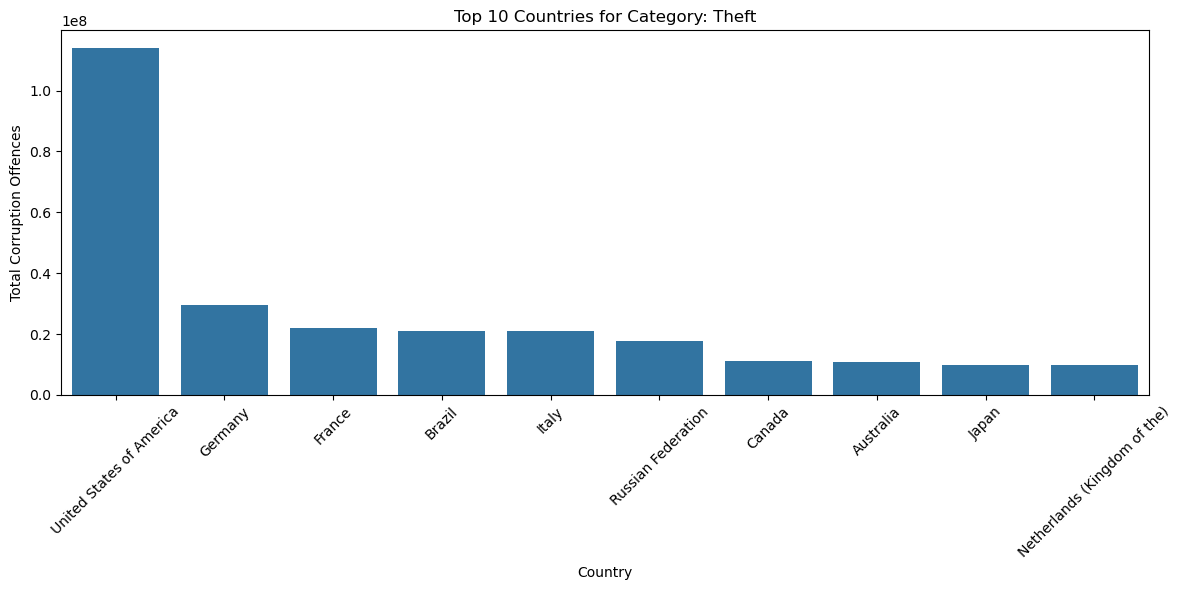

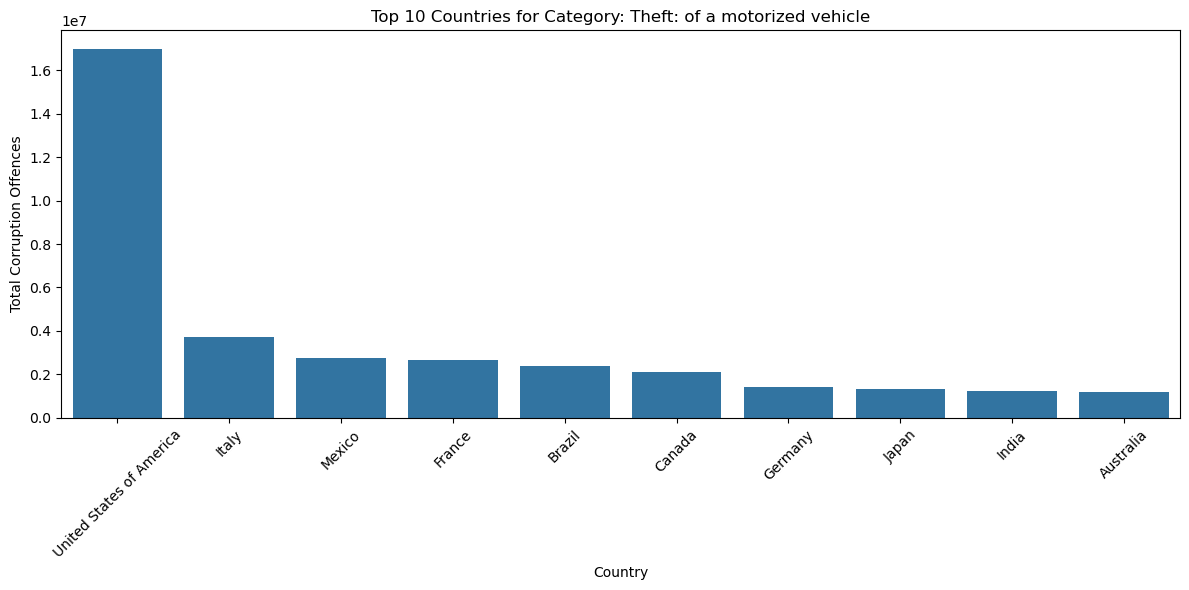

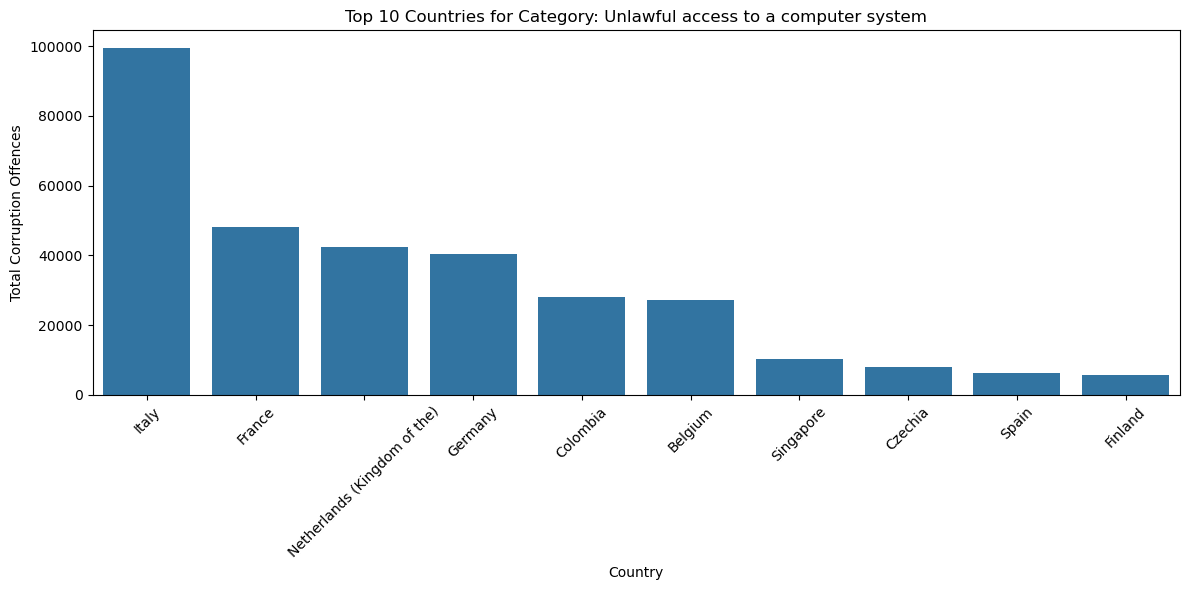

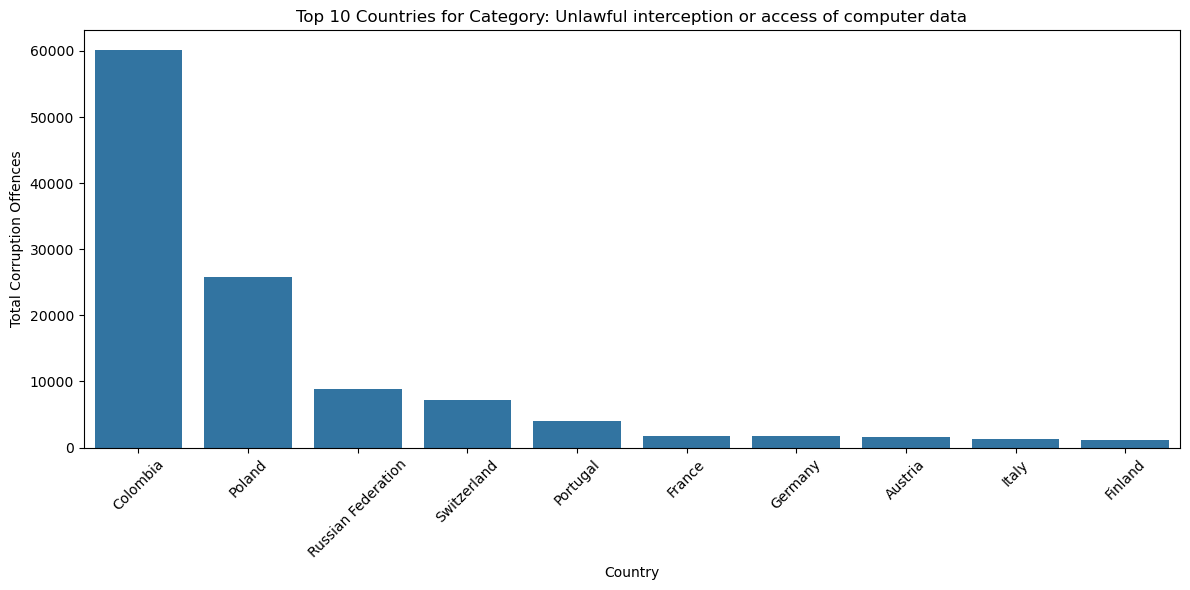

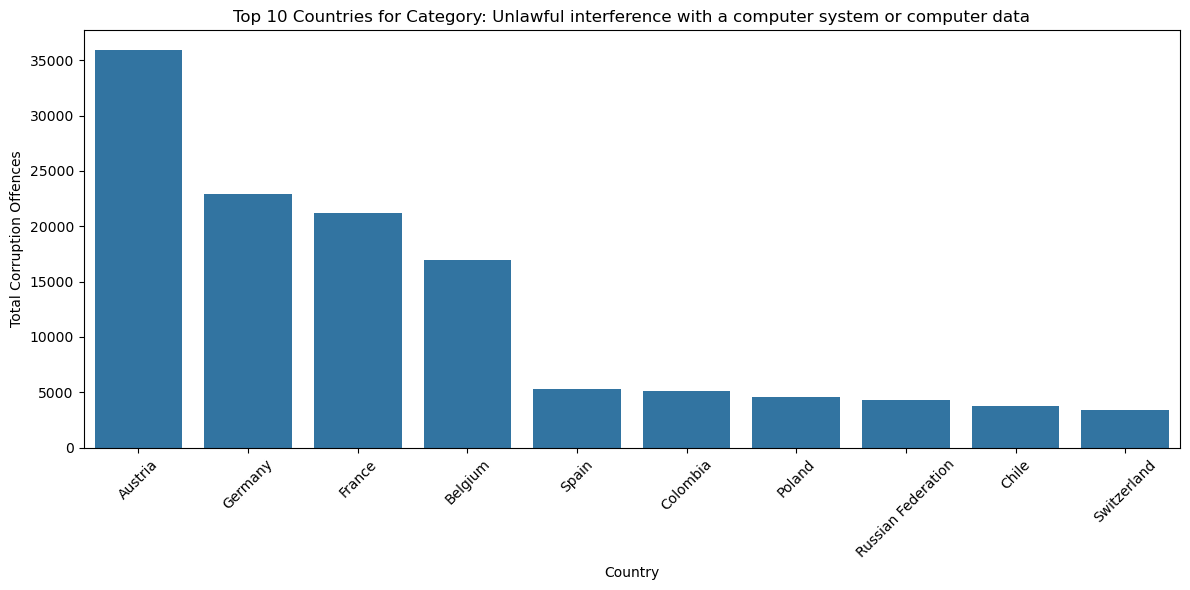

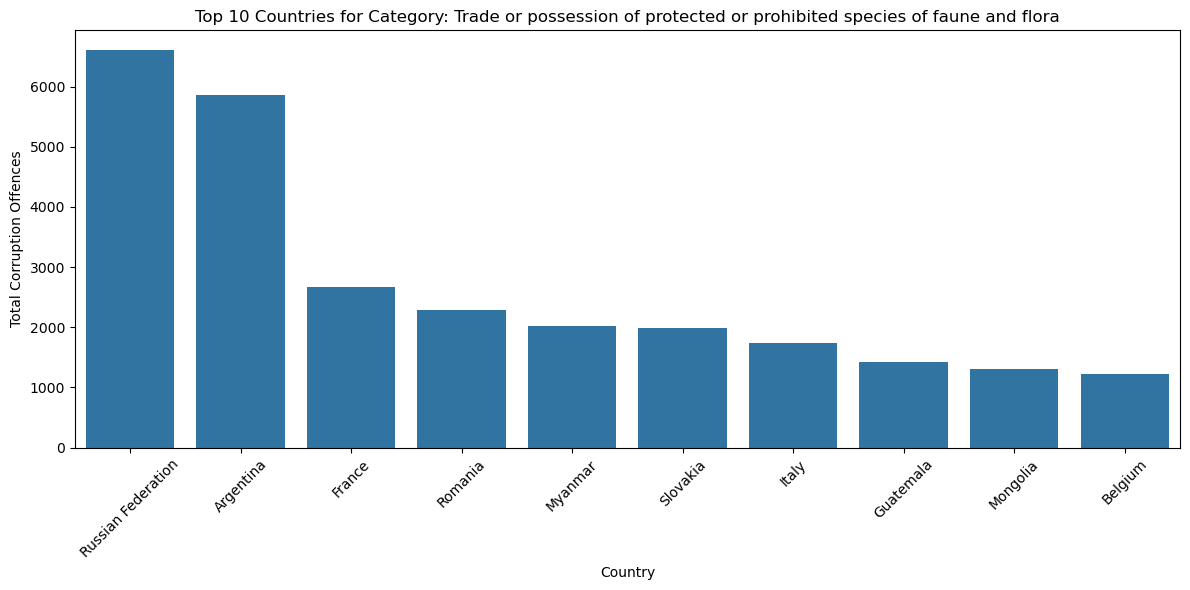

Top 10 Countries for Category: Acts involving the movement of dumping of waste
                           Country  VALUE
600                          Italy 42,736
135                        Belgium 15,224
627                          Japan 11,490
860                        Morocco  9,630
442                         France  6,641
896   Netherlands (Kingdom of the)  3,754
547                        Hungary  2,818
1167                      Slovakia  1,919
16                         Algeria  1,588
426                        Finland  1,528


Top 10 Countries for Category: Acts that cause environmental pollution or degradation
          Country   VALUE
200        Brazil 216,994
466       Germany  69,338
861       Morocco  28,562
999   Philippines  20,015
1235       Sweden  12,385
343       Denmark   9,372
601         Italy   8,675
136       Belgium   7,346
271      Colombia   6,032
17        Algeria   4,111


Top 10 Countries for Category: Acts that result in the depletion of degradation of 

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file into a pandas DataFrame
file_path = r'C:\Users\dhaswin\Desktop\Crime data and community investments\Cleaned Dataset\data_cts_corruption_and_economic_crime.xlsx'
df = pd.read_excel(file_path, sheet_name='Corruption Altered')

# Clean data by handling missing or irrelevant values
df = df.dropna(subset=['Country', 'Category', 'VALUE'])  # Drop rows where essential columns are missing

# Ensure 'VALUE' is numeric
df['VALUE'] = pd.to_numeric(df['VALUE'], errors='coerce')

# Drop rows where 'VALUE' is invalid after conversion
df = df.dropna(subset=['VALUE'])

# --- Aggregating Total Corruption Offences by Country and Category ---
country_category_data = df.groupby(['Country', 'Category'])['VALUE'].sum().reset_index()

# --- Descriptive Analysis: Top 10 Countries per Category ---
top_10_countries_per_category = {}

# Iterate over each category
for category in country_category_data['Category'].unique():
    # Filter data for the specific category
    category_data = country_category_data[country_category_data['Category'] == category]
    
    # Sort by the 'VALUE' column to get top 10 countries
    top_10 = category_data.sort_values(by='VALUE', ascending=False).head(10)
    top_10_countries_per_category[category] = top_10

# --- Visualize the Results ---
for category, data in top_10_countries_per_category.items():
    plt.figure(figsize=(12, 6))
    sns.barplot(data=data, x='Country', y='VALUE')
    plt.title(f'Top 10 Countries for Category: {category}')
    plt.xlabel('Country')
    plt.ylabel('Total Corruption Offences')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# --- Display the Top 10 Countries Table ---
# Set display options to show full numbers for all digits
pd.set_option('display.float_format', '{:,.0f}'.format)  # This ensures no truncation of large numbers

for category, data in top_10_countries_per_category.items():
    print(f"Top 10 Countries for Category: {category}")
    print(data[['Country', 'VALUE']])
    print("\n")


Top 10 Subregion:
top_10_Subregion.to_string()


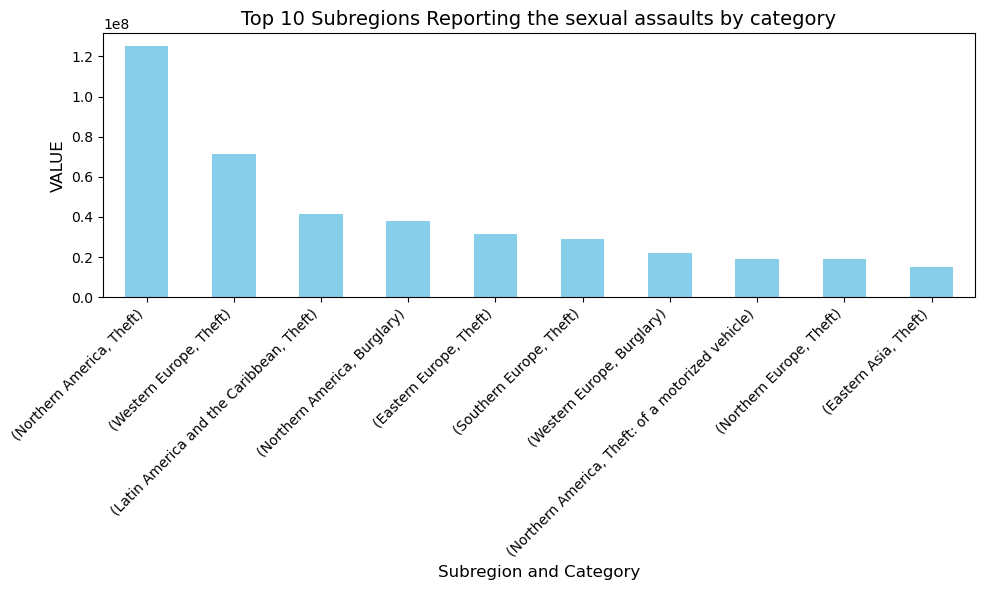


Analysis and chart saved to 'corruption_by_subregion_category_barchart.xlsx'.


In [113]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file into a pandas DataFrame
file_path = r'C:\Users\dhaswin\Desktop\Crime data and community investments\Cleaned Dataset\data_cts_corruption_and_economic_crime.xlsx'
df = pd.read_excel(file_path, sheet_name='Corruption Altered')


# Assuming the columns are named 'Subregion', 'Category', and 'Corruption Counts'
# If not, replace these with the correct column names

# Ensure the necessary columns are present in the DataFrame
required_columns = ['Subregion', 'Category', 'VALUE']

# Aggregating total corruption counts for each combination of 'Subregion' and 'Category'
corruption_by_subregion = df.groupby(['Subregion', 'Category'])['VALUE'].sum()

# Sort the results by corruption counts in descending order to find the subregions with the highest corruption reports
sorted_corruption = corruption_by_subregion.sort_values(ascending=False)

# Display the top 10 subregions and categories with the highest corruption reports
top_corruption = sorted_corruption.head(10)  # Display top 10 results, you can adjust this number

print("Top 10 Subregion:")
print("top_10_Subregion.to_string()")

# Create a bar chart for the top subregions reporting the most corruption by category
plt.figure(figsize=(10, 6))
top_corruption.plot(kind='bar', color='skyblue')

# Add titles and labels
plt.title('Top 10 Subregions Reporting the Corruption Crime by category', fontsize=14)
plt.xlabel('Subregion and Category', fontsize=12)
plt.ylabel('VALUE', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Display the chart
plt.tight_layout()
plt.show()

# Optional: Save the results to a new Excel file
top_corruption_df = top_corruption.reset_index()
top_corruption_df.columns = ['Subregion', 'Category', 'VALUE']
top_corruption_df.to_excel('corruption_by_subregion_category_barchart.xlsx', index=False)

print("\nAnalysis and chart saved to 'corruption_by_subregion_category_barchart.xlsx'.")

  Iso3_code      Country    Region                        Subregion Indicator  \
0       ARM      Armenia      Asia                     Western Asia  Offences   
1       AUT      Austria    Europe                   Western Europe  Offences   
2       CHE  Switzerland    Europe                   Western Europe  Offences   
3       CHL        Chile  Americas  Latin America and the Caribbean  Offences   
4       COL     Colombia  Americas  Latin America and the Caribbean  Offences   

            Dimension    Category    Sex    Age  Year Unit of measurement  \
0  by type of offence  Corruption  Total  Total  2013              Counts   
1  by type of offence  Corruption  Total  Total  2013              Counts   
2  by type of offence  Corruption  Total  Total  2013              Counts   
3  by type of offence  Corruption  Total  Total  2013              Counts   
4  by type of offence  Corruption  Total  Total  2013              Counts   

   VALUE Source  
0    782    CTS  
1  3,439    CT

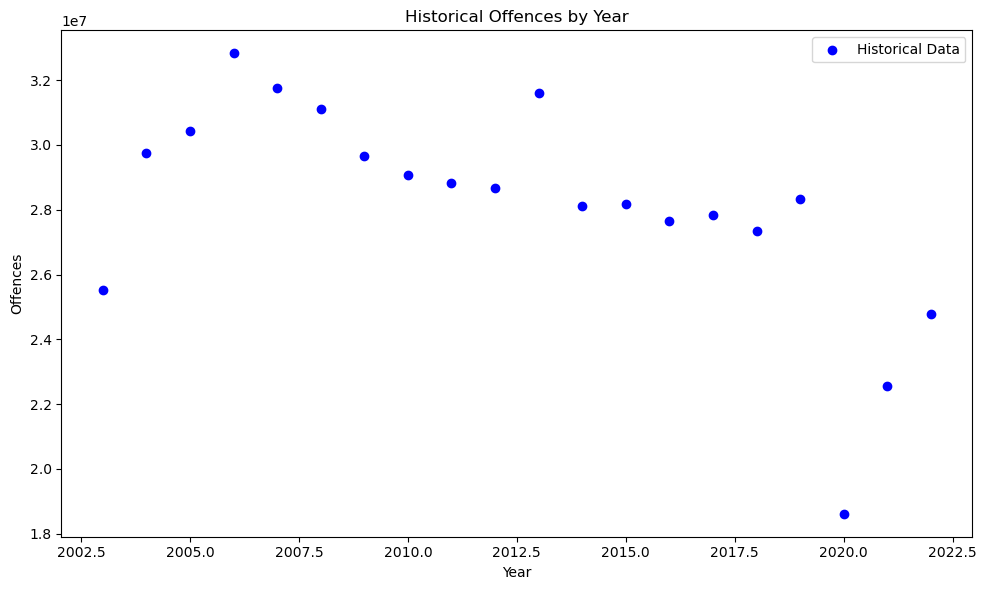

Mean Squared Error: 23645106132487.07
R^2 Score: -0.3773
The year with the highest predicted offences is 2006 with approximately 32039377 offences.


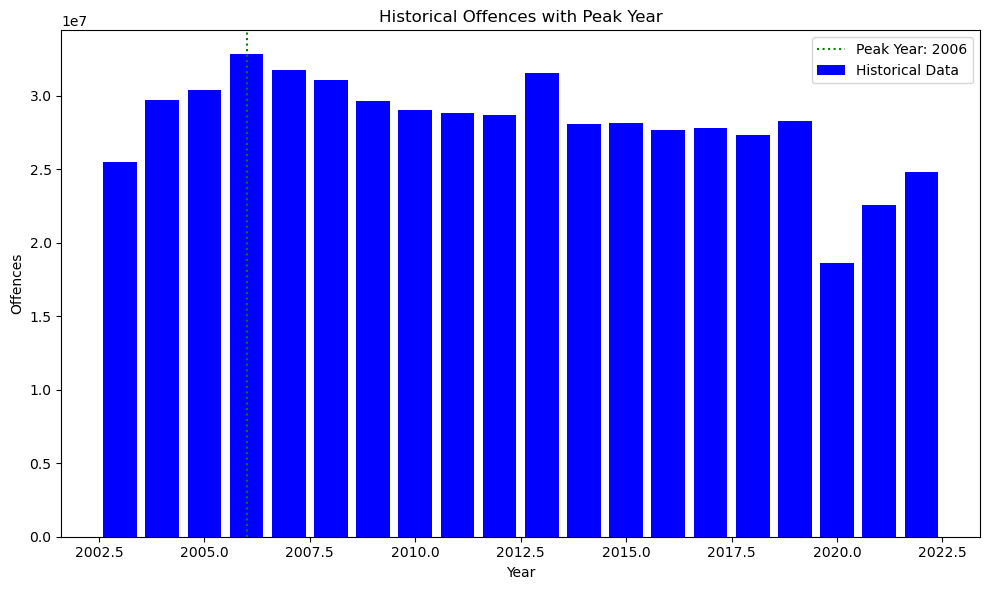

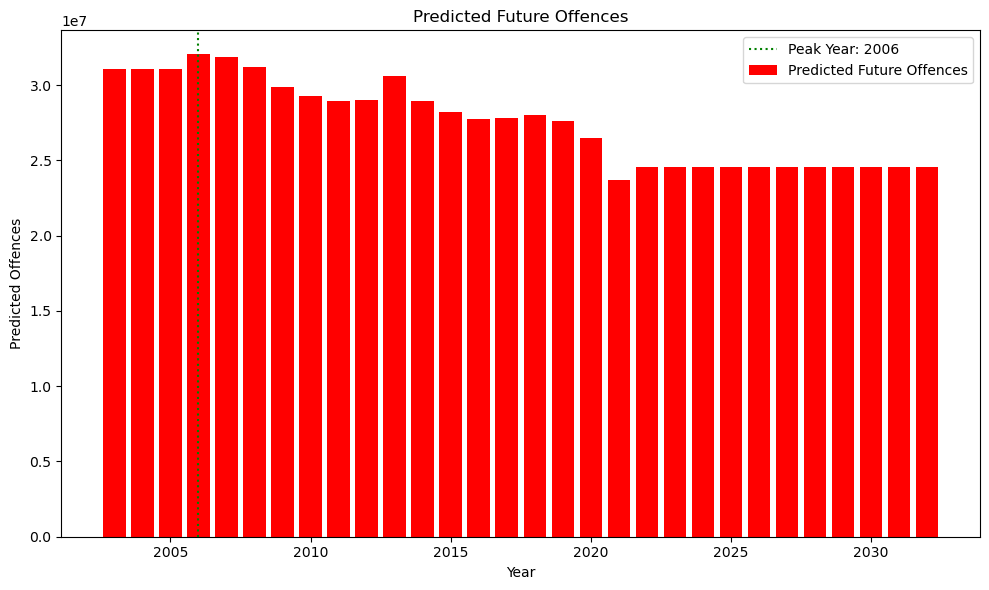

In [121]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the Excel file into a pandas DataFrame
file_path = r'C:\Users\dhaswin\Desktop\Crime data and community investments\Cleaned Dataset\data_cts_corruption_and_economic_crime.xlsx'
df = pd.read_excel(file_path, sheet_name='Corruption Altered')

# Inspect the first few rows to check data structure
print(df.head())

# Clean data by handling missing or irrelevant values
df = df.dropna(subset=['Year', 'VALUE'])  # Drop rows where 'Year' or 'VALUE' are missing

# Ensure 'Year' is numeric and 'VALUE' is also numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['VALUE'] = pd.to_numeric(df['VALUE'], errors='coerce')

# Drop rows with invalid 'Year' or 'VALUE' after conversion
df = df.dropna(subset=['Year', 'VALUE'])

# Aggregate offences by year
offence_trends = df.groupby('Year')['VALUE'].sum().reset_index()

# Print historical offences for each year
print("Historical Offences for Each Year:")
print(offence_trends)

# --- Visualize Historical Data to Check for Trends ---
plt.figure(figsize=(10, 6))
plt.scatter(offence_trends['Year'], offence_trends['VALUE'], color='blue', label='Historical Data')
plt.xlabel('Year')
plt.ylabel('Offences')
plt.title('Historical Offences by Year')
plt.legend()
plt.tight_layout()
plt.show()

# Prepare data for Random Forest regression
X = offence_trends[['Year']]  # Feature (Year)
y = offence_trends['VALUE']   # Target (Offences)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Make predictions
predictions = rf_model.predict(X_test)

# Calculate Mean Squared Error (MSE) and R2 score for accuracy
mse = mean_squared_error(y_test, predictions)
r2 = rf_model.score(X_test, y_test)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.4f}")  # R-squared value for accuracy

# If R^2 score is high, then the model is performing well

# Predict future years (up to 10 years ahead)
future_years = pd.DataFrame(np.arange(X['Year'].min(), X['Year'].max() + 11), columns=['Year'])
future_predictions = rf_model.predict(future_years)

# Find the year with the highest predicted offences
peak_year = future_years.iloc[np.argmax(future_predictions)]['Year']
peak_value = np.max(future_predictions)

print(f"The year with the highest predicted offences is {peak_year} with approximately {peak_value:.0f} offences.")

# --- Historical Offence Bar Chart ---
plt.figure(figsize=(10, 6))
plt.bar(offence_trends['Year'], offence_trends['VALUE'], color='blue', label='Historical Data')
plt.axvline(x=peak_year, color='green', linestyle=':', label=f"Peak Year: {peak_year}")
plt.xlabel('Year')
plt.ylabel('Offences')
plt.title('Historical Offences with Peak Year')
plt.legend()
plt.tight_layout()
plt.show()

# --- Future Prediction Bar Chart ---
plt.figure(figsize=(10, 6))
plt.bar(future_years['Year'], future_predictions, color='red', label='Predicted Future Offences')
plt.axvline(x=peak_year, color='green', linestyle=':', label=f"Peak Year: {peak_year}")
plt.xlabel('Year')
plt.ylabel('Predicted Offences')
plt.title('Predicted Future Offences')
plt.legend()
plt.tight_layout()
plt.show()

# Set display options to show full numbers for all digits
pd.set_option('display.float_format', '{:,.0f}'.format) 


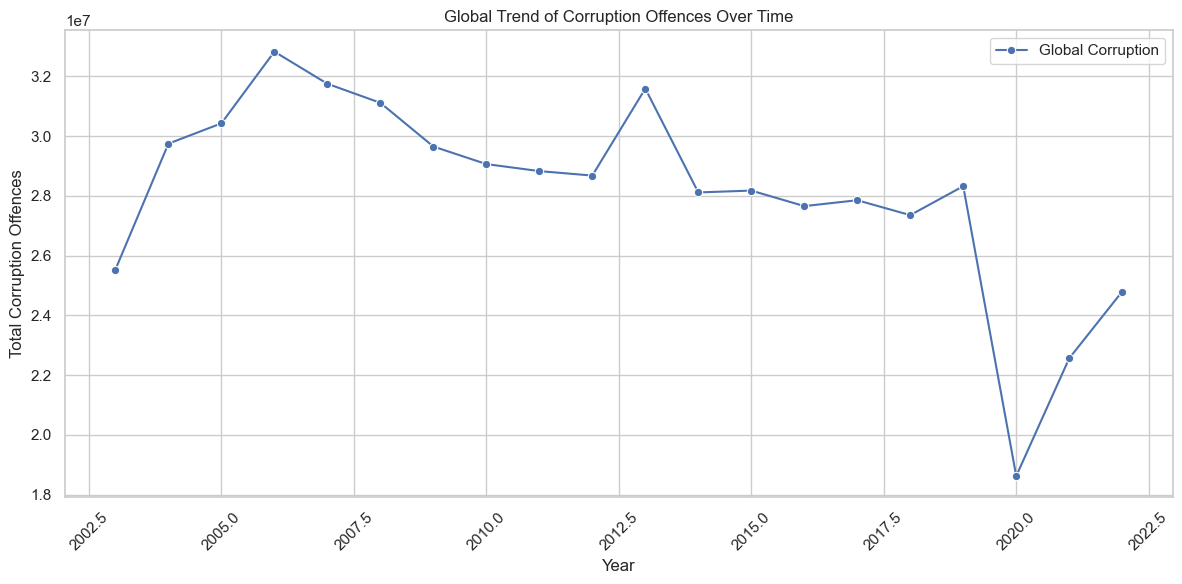

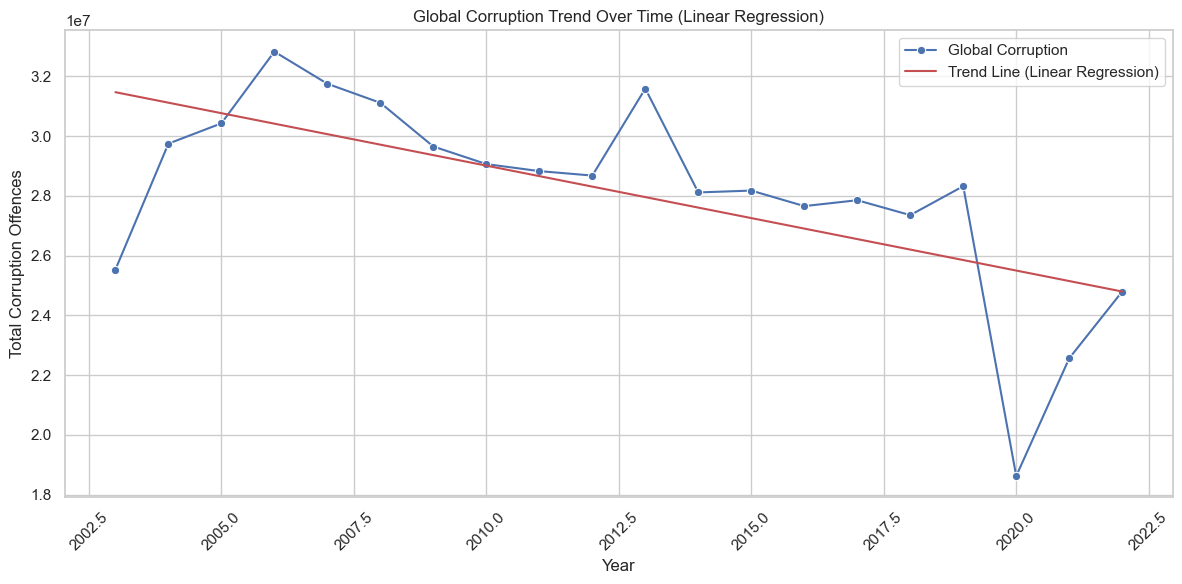

Linear Regression Slope: -351180.23
Linear Regression Intercept: 734883726.41
R-squared Value: 0.3940


Global Corruption Offences Over Time (Total per Year):
    Year      VALUE
0   2003 25,531,435
1   2004 29,747,287
2   2005 30,426,843
3   2006 32,827,365
4   2007 31,751,658
5   2008 31,113,866
6   2009 29,651,389
7   2010 29,063,339
8   2011 28,828,284
9   2012 28,678,822
10  2013 31,590,353
11  2014 28,114,347
12  2015 28,176,415
13  2016 27,656,948
14  2017 27,853,384
15  2018 27,354,803
16  2019 28,323,114
17  2020 18,620,317
18  2021 22,562,246
19  2022 24,798,006


In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load the Excel file into a pandas DataFrame
file_path = r'C:\Users\dhaswin\Desktop\Crime data and community investments\Cleaned Dataset\data_cts_corruption_and_economic_crime.xlsx'
df = pd.read_excel(file_path, sheet_name='Corruption Altered')

# Clean data by handling missing or irrelevant values
df = df.dropna(subset=['Year', 'VALUE'])  # Drop rows where 'Year' or 'VALUE' is missing

# Ensure 'VALUE' is numeric
df['VALUE'] = pd.to_numeric(df['VALUE'], errors='coerce')

# Drop rows where 'VALUE' is invalid after conversion
df = df.dropna(subset=['VALUE'])

# --- Aggregating Total Corruption Offences Globally Over Time ---
corruption_trends = df.groupby('Year')['VALUE'].sum().reset_index()

# --- Visualize the Trend Line ---
plt.figure(figsize=(12, 6))
sns.lineplot(data=corruption_trends, x='Year', y='VALUE', marker='o', color='b', label='Global Corruption')
plt.title('Global Trend of Corruption Offences Over Time')
plt.xlabel('Year')
plt.ylabel('Total Corruption Offences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Linear Regression for Trend Analysis ---
# Prepare the data for linear regression (Year as X and Total Offences as y)
X = corruption_trends['Year'].values.reshape(-1, 1)
y = corruption_trends['VALUE'].values

# Initialize and fit a Linear Regression model
regressor = LinearRegression()
regressor.fit(X, y)

# Predict the trend line values
y_pred = regressor.predict(X)

# Plot the trend line along with the original data
plt.figure(figsize=(12, 6))
sns.lineplot(data=corruption_trends, x='Year', y='VALUE', marker='o', color='b', label='Global Corruption')
plt.plot(corruption_trends['Year'], y_pred, color='r', label='Trend Line (Linear Regression)')
plt.title('Global Corruption Trend Over Time (Linear Regression)')
plt.xlabel('Year')
plt.ylabel('Total Corruption Offences')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# --- Output the trend analysis results ---
slope = regressor.coef_[0]  # The slope of the line indicates the change in corruption over time
intercept = regressor.intercept_
r_squared = regressor.score(X, y)  # R^2 score for the accuracy of the trend line

print(f"Linear Regression Slope: {slope:.2f}")
print(f"Linear Regression Intercept: {intercept:.2f}")
print(f"R-squared Value: {r_squared:.4f}")
print("\n")

# --- Display the Aggregated Data for Corruption Over Time ---
print("Global Corruption Offences Over Time (Total per Year):")
print(corruption_trends)

# Optional: Save the trend data to an Excel file
corruption_trends.to_excel('global_corruption_trends_over_time.xlsx', index=False)
